In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import psycopg2
from sqlalchemy import create_engine

In [2]:
# Read the data into a Pandas DataFrame
vehicles_df = pd.read_csv(os.getcwd()+'/data/vehicles.csv')
vehicles_df.tail()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [3]:
# List column names
list(vehicles_df)

['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'county',
 'state',
 'lat',
 'long',
 'posting_date']

In [4]:
# Get datatypes and null info
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
# Total number of unique car manufacturers 
manufacturers = len(vehicles_df["manufacturer"].unique())
manufacturers


43

In [6]:
# Total number of unique car models
models = len(vehicles_df["model"].unique())
models


29668

In [7]:
# Looking closer at model counts
model_counts = vehicles_df["model"].value_counts()
model_counts

f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
Huyndai Sante Fe Limited       1
astro awd 4x4                  1
escalade and                   1
cx 3                           1
Paige Glenbrook Touring        1
Name: model, Length: 29667, dtype: int64

In [8]:
# Count of listings
listing_count = len(vehicles_df.index)
listing_count


426880

In [9]:
# Total number of unique years
years = len(vehicles_df["year"].unique())
years

115

In [10]:
model_years = vehicles_df["year"].value_counts()
model_years.head()


2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
Name: year, dtype: int64

In [11]:
# Drop irrelevant features
vehicles_df.drop(['id','url','region','region_url','model','fuel','drive','type','paint_color','county','VIN','lat','long','description','image_url'], axis=1, inplace=True)


In [12]:
# drop all null values by row
vehicles_df.dropna(axis=0, inplace=True)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88268 entries, 31 to 426836
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         88268 non-null  int64  
 1   year          88268 non-null  float64
 2   manufacturer  88268 non-null  object 
 3   condition     88268 non-null  object 
 4   cylinders     88268 non-null  object 
 5   odometer      88268 non-null  float64
 6   title_status  88268 non-null  object 
 7   transmission  88268 non-null  object 
 8   size          88268 non-null  object 
 9   state         88268 non-null  object 
 10  posting_date  88268 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 8.1+ MB


In [13]:
# Change year to integer
vehicles_df['year'] = vehicles_df['year'].astype(int)


In [14]:
vehicles_df.sort_values(by='year', ascending=1).head(10)


,price,year,manufacturer,condition,cylinders,odometer,title_status,transmission,size,state,posting_date
42454,38250,1900,acura,new,4 cylinders,4500.0,clean,automatic,mid-size,ca,2021-04-30T16:19:15-0700
289145,3990,1905,chevrolet,excellent,8 cylinders,202570.0,clean,automatic,full-size,oh,2021-05-04T19:34:05-0400
317864,27000,1913,ford,like new,4 cylinders,9999999.0,clean,other,compact,or,2021-04-22T09:50:49-0700
54732,85000,1913,cadillac,good,4 cylinders,150.0,clean,manual,full-size,ca,2021-05-03T16:45:21-0700
350783,12000,1916,dodge,good,4 cylinders,30000.0,missing,manual,full-size,sd,2021-04-08T08:32:19-0600
26712,16000,1918,ford,good,4 cylinders,56000.0,clean,automatic,full-size,ca,2021-04-27T11:45:25-0700
141891,13000,1922,ford,excellent,4 cylinders,999999.0,clean,manual,mid-size,il,2021-04-30T15:43:30-0500
159206,18990,1923,ford,like new,8 cylinders,6652.0,clean,automatic,compact,ia,2021-04-05T12:08:02-0500
294366,25000,1923,ford,excellent,8 cylinders,5600.0,clean,automatic,sub-compact,oh,2021-04-11T17:32:46-0400
189330,18500,1923,ford,excellent,8 cylinders,4963.0,clean,automatic,compact,ma,2021-04-22T14:29:47-0400


In [15]:
# Convert 'posting_date' to only the date
vehicles_df['posting_date'] = vehicles_df['posting_date'].str[:10]

vehicles_df['posting_date'] = pd.to_datetime(vehicles_df['posting_date'])


In [16]:
vehicles_df.head()

,price,year,manufacturer,condition,cylinders,odometer,title_status,transmission,size,state,posting_date
31,15000,2013,ford,excellent,6 cylinders,128000.0,clean,automatic,full-size,al,2021-05-03
55,19900,2004,ford,good,8 cylinders,88000.0,clean,automatic,full-size,al,2021-04-29
59,14000,2012,honda,excellent,6 cylinders,95000.0,clean,automatic,full-size,al,2021-04-27
65,22500,2001,ford,good,8 cylinders,144700.0,clean,manual,full-size,al,2021-04-26
73,15000,2017,dodge,excellent,8 cylinders,90000.0,rebuilt,automatic,mid-size,al,2021-04-24


In [17]:
# Manufacturers count
manufacturer_counts=vehicles_df.groupby('manufacturer').agg(
    num_listings=('manufacturer', 'size'),
    avg_price=('price','median'))

#sort by descending on manufacturer number of listings
manufacturer_counts=manufacturer_counts.sort_values(by='num_listings', ascending=False)
manufacturer_counts

,num_listings,avg_price
manufacturer,,
ford,17074,11500.0
chevrolet,13538,10500.0
toyota,7783,8000.0
honda,5402,6800.0
nissan,4385,7500.0
gmc,3562,13999.0
jeep,3486,10500.0
ram,3269,19995.0
dodge,2869,6995.0


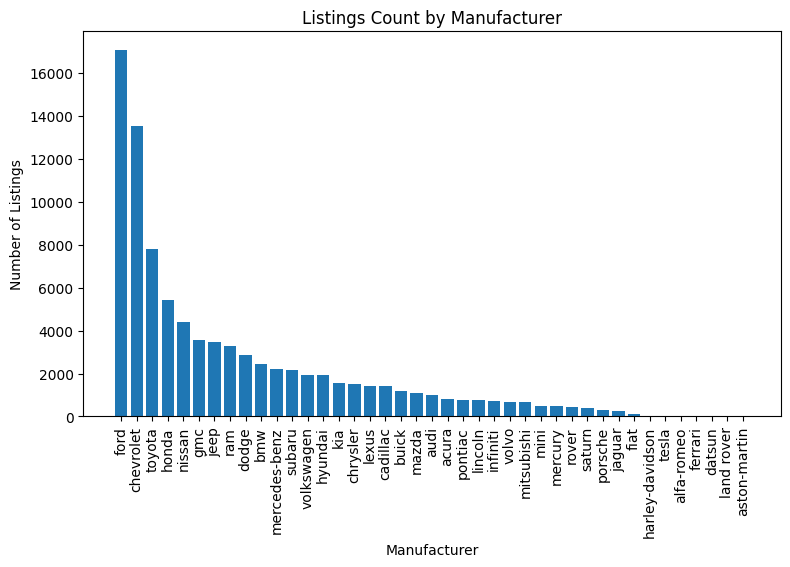

In [18]:
# Chart showing listings count of manufacturers
plt.figure(figsize=(9,5))
plt.bar(manufacturer_counts.index, manufacturer_counts['num_listings'])
plt.title('Listings Count by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.show()

In [19]:
# Average price and listings per state
state_counts=vehicles_df.groupby('state').agg(
num_listings=('state','size'),
avg_price=('price','median'))

state_counts.reset_index(inplace=True)
state_counts['state'] = state_counts['state'].str.upper()
state_counts

,state,num_listings,avg_price
0,AK,701,19995.0
1,AL,956,10500.0
2,AR,753,7500.0
3,AZ,1866,10000.0
4,CA,9640,9000.0
5,CO,1994,8995.0
6,CT,1095,6500.0
7,DC,535,7300.0
8,DE,257,7895.0
9,FL,7010,8675.0


In [20]:
vehicles_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 88268 entries, 31 to 426836
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         88268 non-null  int64         
 1   year          88268 non-null  int64         
 2   manufacturer  88268 non-null  object        
 3   condition     88268 non-null  object        
 4   cylinders     88268 non-null  object        
 5   odometer      88268 non-null  float64       
 6   title_status  88268 non-null  object        
 7   transmission  88268 non-null  object        
 8   size          88268 non-null  object        
 9   state         88268 non-null  object        
 10  posting_date  88268 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 8.1+ MB


In [21]:
# Export cleaned csv file
vehicles_df.to_csv("data/vehicles_clean.csv", index=False)
